Atividade(0.5): Realizar a avaliação da capacidade da MLP: 
<ol>
        <li> Extrapolar o tutorial acima para outro datasetmake_gaussian_quantiles para gerar dados sintéticos. Para alcançar um dataset mais real, vamos inserir um ruído gaussiano, conforme o código abaixo que deve ser utilizado na função create_dataset(). </li>
        <li> Aumentar o número de nós e camadas para encontrar o ponto em que o algoritmo de aprendizado não é mais capaz de aprender o problema. </li> 
    
</ol>

In [10]:
from sklearn.datasets import make_gaussian_quantiles
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
from numpy import where
# Dataset
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
#Modelo
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [11]:
def create_dataset():
    X1, y1 = make_gaussian_quantiles(cov=3., n_samples=10000, n_features=2, n_classes=3, random_state=1)
    X1 = pd.DataFrame(X1,columns=['x','y'])
    y1 = pd.Series(y1)

    X2, y2 = make_gaussian_quantiles(mean=(4, 4), cov=1, n_samples=5000, n_features=2, n_classes=3, random_state=1)
    X2 = pd.DataFrame(X2,columns=['x','y'])
    y2 = pd.Series(y2)

    X = pd.DataFrame(np.concatenate((X1, X2)))
    y = pd.Series(np.concatenate((y1, - y2 + 1)))
    
    y_categorical = to_categorical(y)
    
    # divisão treino/teste
    X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.30, shuffle = True, random_state=42)
    return X_train, y_train, X_test, y_test

In [12]:
X_train, y_train, X_test, y_test = create_dataset()

In [13]:
print(X_train.shape, y_train.shape, X_test.shape,y_test.shape)

(10500, 2) (10500, 3) (4500, 2) (4500, 3)


In [14]:
def model_training(n_nodes, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    print(model.summary())

    # Compilando e treinando o modelo    
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

In [15]:
def model_evaluation(model,X_test, y_test):
    _, test_acc = model.evaluate(X_test, y_test, verbose=0)
    return test_acc

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_28 (Dense)            (None, 1)                 3         
                                                                 
 dense_29 (Dense)            (None, 3)                 6         
                                                                 
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=1: 0.437
Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 2)                 6         
                                                                 
 dense_31 (Dense)            (None, 3)                 9         
                                                                 
Total params: 15
Trainable params: 15
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=2: 0.432
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 3)                 9         
                                                                 
 dense_33 (Dense)            (None, 3)                 12        
                                                                 
Total params: 21
Trainable params: 21
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=3: 0.660
Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 4)                 12        
                                                                 
 dense_35 (Dense)            (None, 3)                 15        
                                                                 
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=4: 0.736
Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 5)                 15        
                                                                 
 dense_37 (Dense)            (None, 3)                 18        
                                                                 
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=5: 0.712
Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 6)                 18        
                                                                 
 dense_39 (Dense)            (None, 3)                 21        
                                                                 
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=6: 0.790
Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 7)                 21        
                                                                 
 dense_41 (Dense)            (None, 3)                 24        
                                                                 
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=7: 0.738
Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 8)                 24        
                                                                 
 dense_43 (Dense)            (None, 3)                 27        
                                                                 
Total params: 51
Trainable params: 51
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=8: 0.841
Model: "sequential_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_44 (Dense)            (None, 9)                 27        
                                                                 
 dense_45 (Dense)            (None, 3)                 30        
                                                                 
Total params: 57
Trainable params: 57
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=9: 0.916
Model: "sequential_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 10)                30        
                                                                 
 dense_47 (Dense)            (None, 3)                 33        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=10: 0.718
Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 11)                33        
                                                                 
 dense_49 (Dense)            (None, 3)                 36        
                                                                 
Total params: 69
Trainable params: 69
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=11: 0.912
Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_50 (Dense)            (None, 12)                36        
                                                                 
 dense_51 (Dense)            (None, 3)                 39        
                                                                 
Total params: 75
Trainable params: 75
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=12: 0.946
Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_52 (Dense)            (None, 13)                39        
                                                                 
 dense_53 (Dense)            (None, 3)                 42        
                                                                 
Total params: 81
Trainable params: 81
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=13: 0.796
Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_54 (Dense)            (None, 14)                42        
                                                                 
 dense_55 (Dense)            (None, 3)                 45        
                                                                 
Total params: 87
Trainable params: 87
Non-trainable params: 0
_________________________________________________________________
None


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


nós=14: 0.928


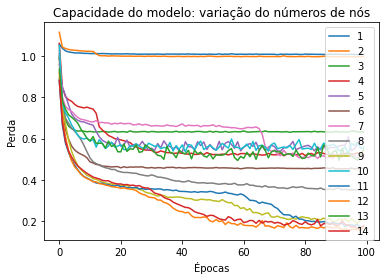

In [16]:
for n_nodes in range(1,15):
    
    model, history = model_training(n_nodes, X_train, y_train)
    test_acc = model_evaluation(model,X_test, y_test)
    print('nós=%d: %.3f' % (n_nodes, test_acc))
    plt.plot(history.history['loss'], label=str(n_nodes))

plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.title('Capacidade do modelo: variação do números de nós')    
plt.legend()
plt.show()

In [19]:
def model_training(n_nodes, n_layers, X_train, y_train):

    n_input, n_classes = X_train.shape[1], y_test.shape[1]
    
    # definindo a arquitetura do modelo 
    model = Sequential()
    model.add(Dense(n_nodes, input_dim=n_input, activation='relu', kernel_initializer='he_uniform'))
    for _ in range(1, n_layers):
        model.add(Dense(n_nodes, activation='relu', kernel_initializer='he_uniform'))
    model.add(Dense(n_classes, activation='softmax'))
    
    # Compilando e treinando o modelo
    opt = SGD(lr=0.01, momentum=0.9)
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    history = model.fit(X_train, y_train, epochs=100, verbose=0)
    return model, history

e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=1: 0.434


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=2: 0.540


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=3: 0.617


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=4: 0.721


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=5: 0.702


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=6: 0.796


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=7: 0.811


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=8: 0.842


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=9: 0.875


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=10: 0.801


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=1; nós=11: 0.870


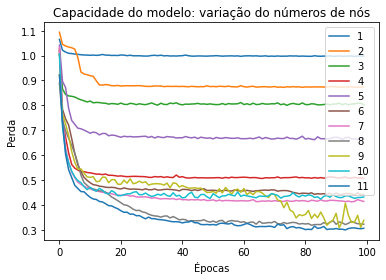

e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=1: 0.327


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=2: 0.578


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=3: 0.685


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=4: 0.834


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=5: 0.810


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=6: 0.898


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=7: 0.927


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=8: 0.924


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=9: 0.948


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=10: 0.886


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=2; nós=11: 0.941


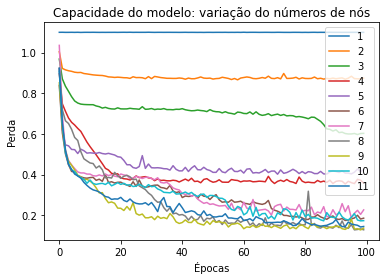

e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=1: 0.327


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=2: 0.561


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=3: 0.766


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=4: 0.866


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=5: 0.868


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=6: 0.840


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=7: 0.933


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=8: 0.945


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=9: 0.950


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=10: 0.939


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=3; nós=11: 0.962


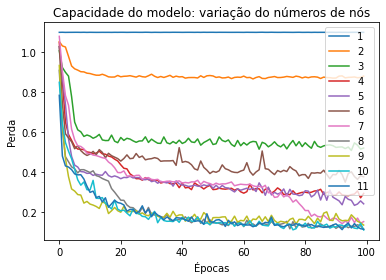

e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=1: 0.327


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=2: 0.327


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=3: 0.544


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=4: 0.327


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=5: 0.899


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=6: 0.922


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=7: 0.959


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=8: 0.920


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=9: 0.932


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=10: 0.966


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=4; nós=11: 0.933


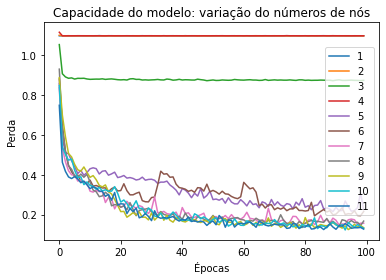

e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=1: 0.326


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=2: 0.327


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=3: 0.719


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=4: 0.765


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=5: 0.847


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=6: 0.938


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=7: 0.946


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=8: 0.870


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=9: 0.938


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=10: 0.878


e:\UFPI\Sistema-Inteligente\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


camadas=5; nós=11: 0.899


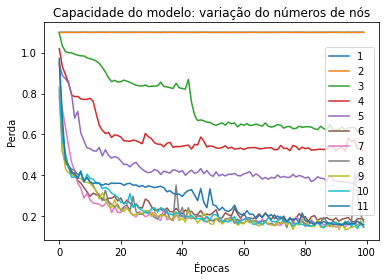

In [20]:
for n_layers in range(1,6):
    for n_nodes in range(1,12):
        model, history = model_training(n_nodes, n_layers, X_train, y_train)
        test_acc = model_evaluation(model,X_test, y_test)
        print('camadas=%d; nós=%d: %.3f' % (n_layers, n_nodes, test_acc))
        plt.plot(history.history['loss'], label=str(n_nodes))

    plt.xlabel('Épocas')
    plt.ylabel('Perda')
    plt.title('Capacidade do modelo: variação do números de nós')    
    plt.legend()
    plt.show()